In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("titanic.csv")

In [3]:
df.shape

(891, 15)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB


## Data Description

- Survival : 0 = No, 1 = Yes
- pclass(Ticket Class) : 1 = 1st, 2 = 2nd, 3 = 3rd
- Sex(Gender) : Male, Female
- Age : Age in years
- SibSp : Number of siblings/spouses abroad the titanic
- Parch : Number of parents/children abrod the titanic
- Ticket : Ticket Number
- Fare : Passenger fare
- Cabin : Cabin Number
- Embarked : Port of Embarkation, C = Cherbourg, Q = Queenstown, S = Southampton

# Q1: Print first and last rows from the dataset

In [5]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [6]:
df.tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
886,0,2,male,27.0,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.00,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True


# Q2: Select only survived people

In [7]:
survived=df.where(df['survived'] == 1)
survived.dropna()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1.0,1.0,female,38.0,1.0,0.0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
3,1.0,1.0,female,35.0,1.0,0.0,53.1000,S,First,woman,False,C,Southampton,yes,False
10,1.0,3.0,female,4.0,1.0,1.0,16.7000,S,Third,child,False,G,Southampton,yes,False
11,1.0,1.0,female,58.0,0.0,0.0,26.5500,S,First,woman,False,C,Southampton,yes,True
21,1.0,2.0,male,34.0,0.0,0.0,13.0000,S,Second,man,True,D,Southampton,yes,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
862,1.0,1.0,female,48.0,0.0,0.0,25.9292,S,First,woman,False,D,Southampton,yes,True
871,1.0,1.0,female,47.0,1.0,1.0,52.5542,S,First,woman,False,D,Southampton,yes,False
879,1.0,1.0,female,56.0,0.0,1.0,83.1583,C,First,woman,False,C,Cherbourg,yes,False
887,1.0,1.0,female,19.0,0.0,0.0,30.0000,S,First,woman,False,B,Southampton,yes,True


# Q3: Select sex, fare, survived columns

In [8]:
sex,fare,survived=(df['sex'],df['fare'],df['survived'])
print(sex,fare,survived)

0        male
1      female
2      female
3      female
4        male
        ...  
886      male
887    female
888    female
889      male
890      male
Name: sex, Length: 891, dtype: object 0       7.2500
1      71.2833
2       7.9250
3      53.1000
4       8.0500
        ...   
886    13.0000
887    30.0000
888    23.4500
889    30.0000
890     7.7500
Name: fare, Length: 891, dtype: float64 0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: survived, Length: 891, dtype: int64


# Q4: Add a new_column to a DataFrame that combines class and embark_town

In [9]:
df['new_column'] = df['class'] + ' - ' + df['embark_town']
(df)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,new_column
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,Third - Southampton
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,First - Cherbourg
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,Third - Southampton
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,First - Southampton
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,Third - Southampton
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True,Second - Southampton
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True,First - Southampton
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False,Third - Southampton
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True,First - Cherbourg


# Q5: Remove new_column from the DataFrame

In [10]:
df = df.drop('new_column', axis=1)
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


# Q6: Filter DataFrame for rows of survived Males only 

In [11]:
survived_males = df[(df['survived'] == 1) & (df['sex'] == 'male')]
survived_males.dropna()
survived_males

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
17,1,2,male,NaN,0,0,13.0000,S,Second,man,True,NaN,Southampton,yes,True
21,1,2,male,34.0,0,0,13.0000,S,Second,man,True,D,Southampton,yes,True
23,1,1,male,28.0,0,0,35.5000,S,First,man,True,A,Southampton,yes,True
36,1,3,male,NaN,0,0,7.2292,C,Third,man,True,NaN,Cherbourg,yes,True
55,1,1,male,NaN,0,0,35.5000,S,First,man,True,C,Southampton,yes,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
838,1,3,male,32.0,0,0,56.4958,S,Third,man,True,NaN,Southampton,yes,True
839,1,1,male,NaN,0,0,29.7000,C,First,man,True,C,Cherbourg,yes,True
857,1,1,male,51.0,0,0,26.5500,S,First,man,True,E,Southampton,yes,True
869,1,3,male,4.0,1,1,11.1333,S,Third,child,False,NaN,Southampton,yes,False


# Q7: The total number of males who survived 

In [12]:
x=df[(df['survived'] == 1) & (df['sex'] == 'male')].shape[0]
x

109

# Q8: How many values in each class?

In [13]:
y=df["class"].value_counts()
y

class
Third     491
First     216
Second    184
Name: count, dtype: int64

# Import Seaborn

In [14]:
import seaborn as sns 

# Q9: Draw barplot represents survived people based on sex

<Axes: xlabel='sex', ylabel='survived'>

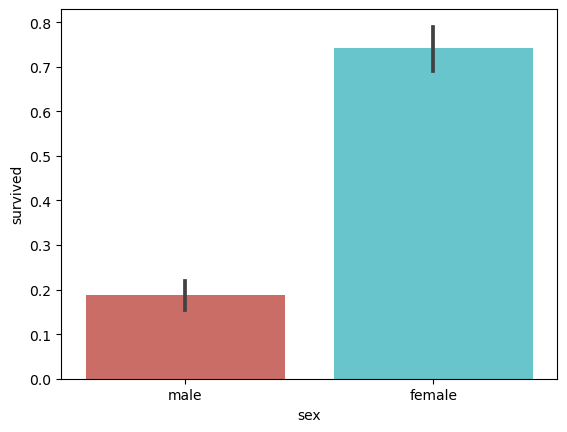

In [15]:
sns.barplot(x='sex',y='survived',data=df, palette='hls')

# Q10: Draw catplot represents survived people based on embarked

C:\Users\rojmi\anaconda4\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


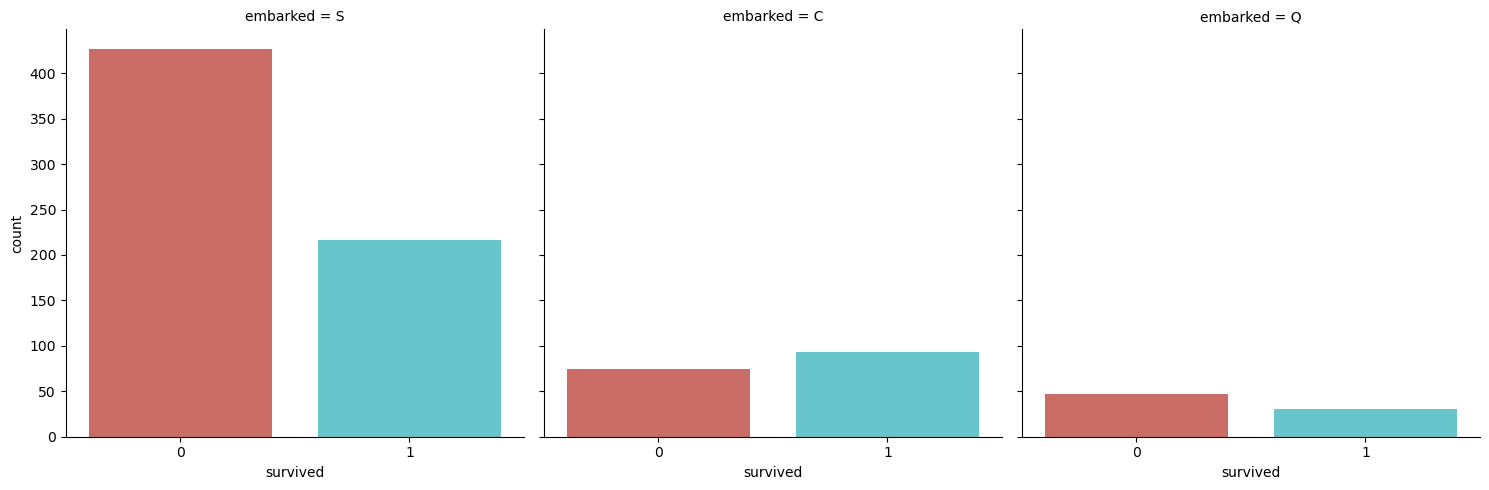

In [16]:
sns.catplot(data = df, x ='survived', col='embarked', kind='count',palette='hls');

# Q11: Draw boxplot represents distribution of male and female based on age and pclass

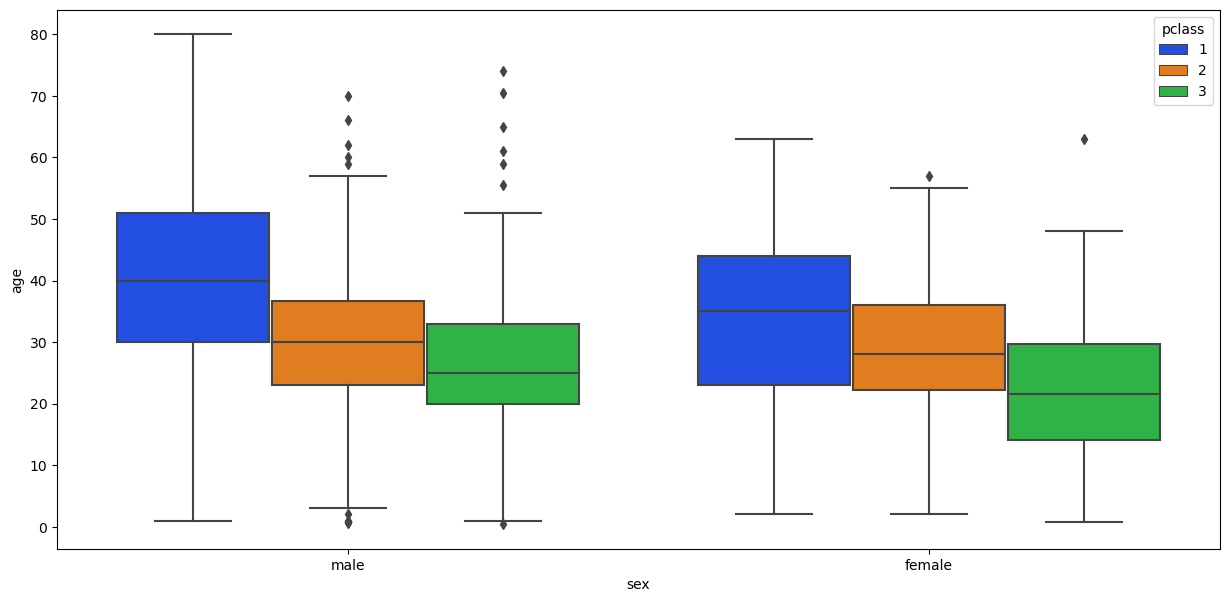

In [17]:
plt.figure(figsize=(15,7))
sns.boxplot(data=df, x='sex', y='age', hue='pclass', palette='bright')
plt.show()


# Q12: Draw heatmap represents correlations between sibsp, parch, age, fare, and survived columns

<Axes: >

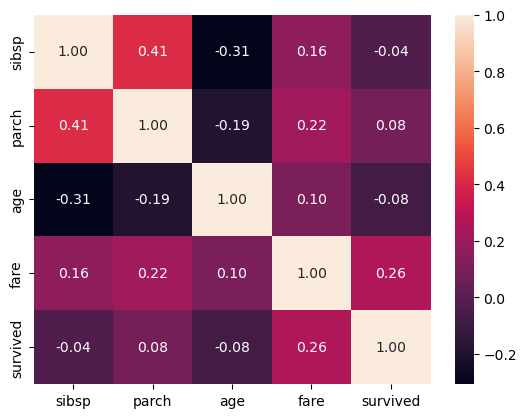

In [18]:
sns.heatmap(data = df[['sibsp','parch','age','fare','survived']].corr(), annot= True ,fmt=".2f")

# Q13: Draw factorplot represents the relation between sibsp and survived columns

C:\Users\rojmi\anaconda4\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


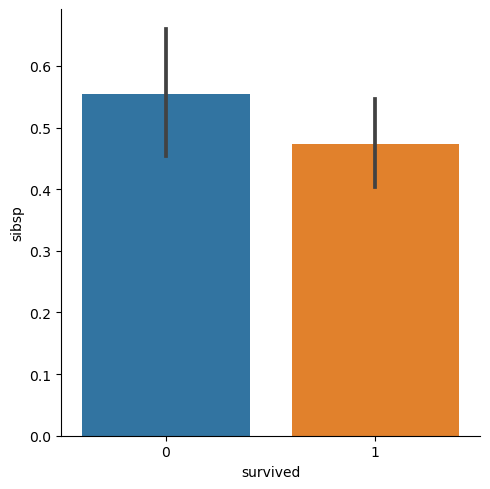

<Figure size 1500x700 with 0 Axes>

In [19]:
sns.catplot(data= df, x='survived', y='sibsp', kind='bar')
plt.figure(figsize=(15,7))
plt.show()

# Q14: Draw extra insights [Optional]